<a href="https://colab.research.google.com/github/grandyella/final-project/blob/master/tugas_akhir_cognito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# classifier options
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')



# LANGKAH 1: Import Dataset & Evaluate Data Structure


In [ ]:
import pandas as pd
# from google.colab import drive

# # Langkah 1: Mount Google Drive
# drive.mount('/content/drive')

# Langkah 2: Tentukan path ke file
file_path = 'https://raw.githubusercontent.com/DamaDamanik/FP_RainTomorrowPredict/refs/heads/main/weatherAUS.csv'

# Langkah 3: Baca file menggunakan pandas
try:
    df = pd.read_csv(file_path)
    print("File berhasil dimuat!")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di path '{file_path}'")
    print("Pastikan nama file dan lokasi folder sudah benar.")

File berhasil dimuat!
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("--- 1. Struktur Data & Info Awal ---")
print(df.head())

--- 1. Struktur Data & Info Awal ---
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0         

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.insert(
    loc=list(df.columns).index('Date') + 1,
    column="Year",
    value=df['Date'].dt.year
)

df.insert(
    loc=list(df.columns).index('Date') + 2,
    column="Month",
    value=df['Date'].dt.month
)

df.insert(
    loc=list(df.columns).index('Date') + 3,
    column="Day",
    value=df['Date'].dt.day
)

df.insert(
    loc=list(df.columns).index('Date') + 4,
    column="Season",
    value=(df['Month'] % 12 + 3) // 3  # 1: Summer, 2: Fall, 3: Winter, 4: Spring
)

df.drop('Date', axis=1, inplace=True)

In [ ]:
df['RainTomorrow'].groupby(df['Season']).count()

,RainTomorrow
Season,
1,34256
2,37397
3,35930
4,34610


In [ ]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# List lokasi per region, total 49
north = ['Cairns', 'Townsville', 'Brisbane', 'Moree', 'MountGinini', 'Katherine', 'Darwin', 'AliceSprings', 'Uluru']
east  = ['Sydney', 'SydneyAirport', 'Newcastle', 'NorahHead', 'CoffsHarbour', 'Wollongong', 'Williamtown', 'Canberra',
         'Tuggeranong', 'Richmond', 'Penrith', 'Albury', 'WaggaWagga', 'BadgerysCreek', 'GoldCoast']
south = ['Hobart', 'Launceston', 'MountGambier', 'Adelaide', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport',
         'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'NorfolkIsland', 'Nuriootpa']
west  = ['Perth', 'PerthAirport', 'PearceRAAF', 'Albany', 'Walpole', 'Witchcliffe', 'SalmonGums', 'Woomera', 'Cobar']
def assign_region(location):
    if location in north:
        return 'North'
    elif location in east:
        return 'East'
    elif location in south:
        return 'South'
    elif location in west:
        return 'West'

df['Region'] = df['Location'].apply(assign_region)
df.head()

,Year,Month,Day,Season,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Region
0,2008,12,1,1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,East
1,2008,12,2,1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,East
2,2008,12,3,1,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,East
3,2008,12,4,1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,East
4,2008,12,5,1,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,East


In [ ]:
print("\n--- 2. Cek Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False))


--- 2. Cek Missing Values ---
Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Day                  0
Year                 0
Season               0
Month                0
Region               0
dtype: int64


# LANGKAH 2: Exploratory Data Analyst (EDA)


--- 3. Distribusi Target (RainTomorrow) ---
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64


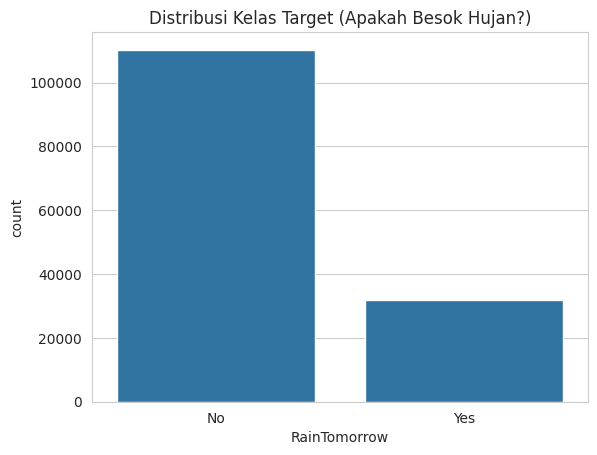

In [ ]:
print("\n--- 3. Distribusi Target (RainTomorrow) ---")
# Menghitung persentase
print(df['RainTomorrow'].value_counts(normalize=True) * 100)
# Membuat plot
sns.set_style("whitegrid")
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribusi Kelas Target (Apakah Besok Hujan?)')
plt.show()


--- 4. Visualisasi Data ---


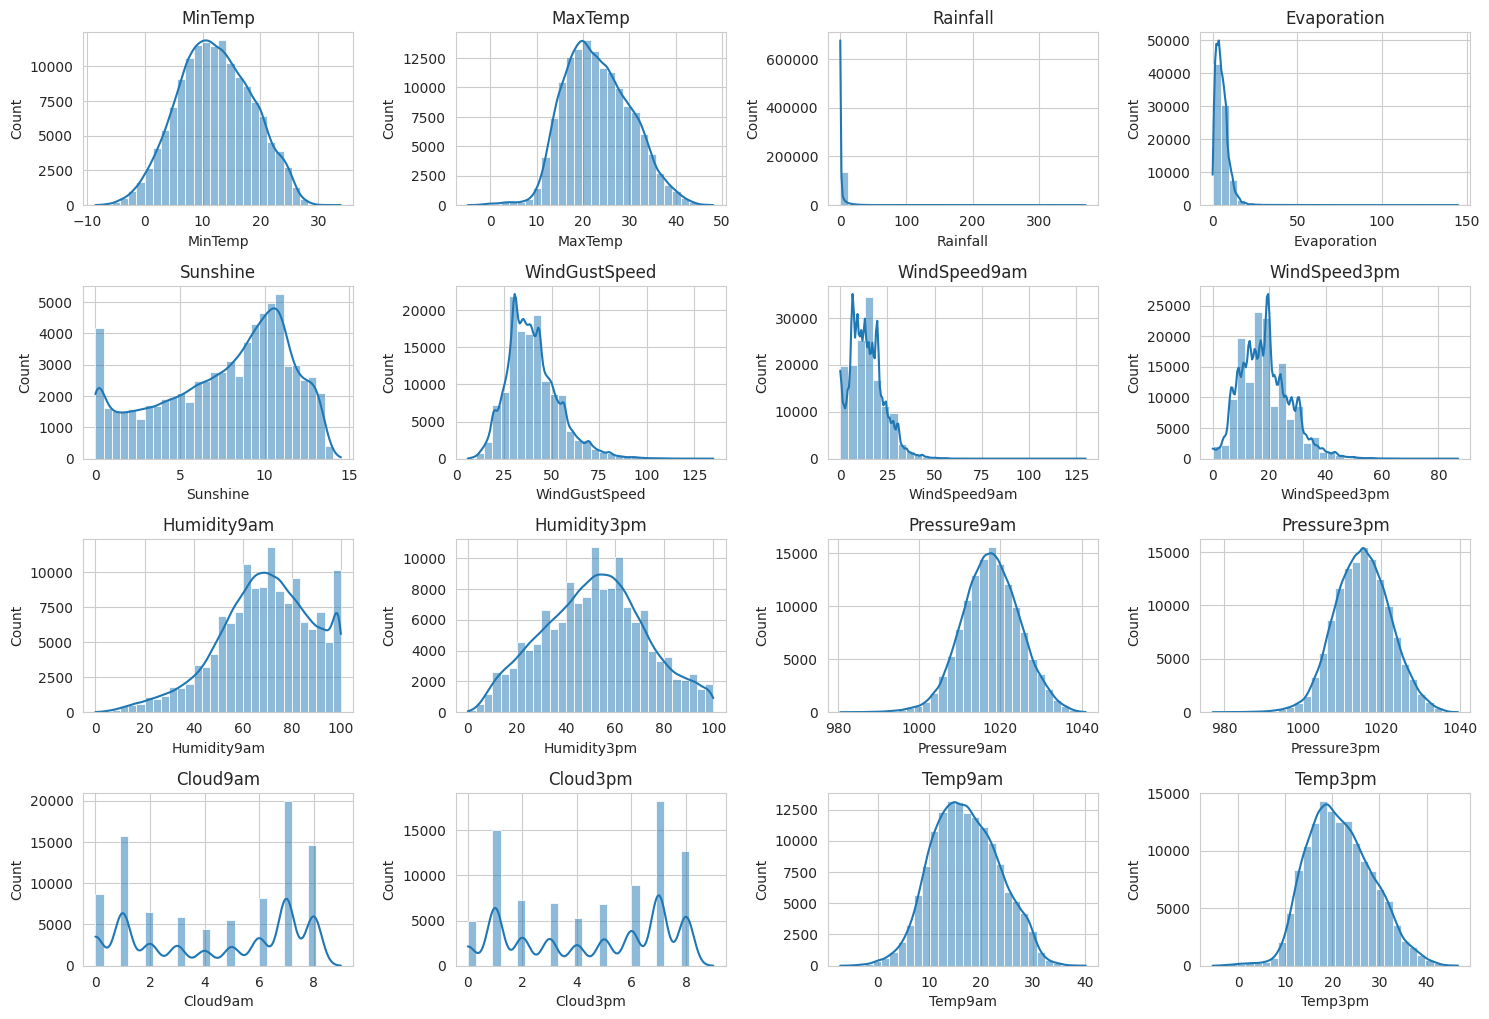

In [ ]:
print("\n--- 4. Visualisasi Data ---")
# Histogram untuk data numerik (Contoh: MaxTemp)
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
n_rows = (len(num_cols) + 1) // 2
n_cols = 4

plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

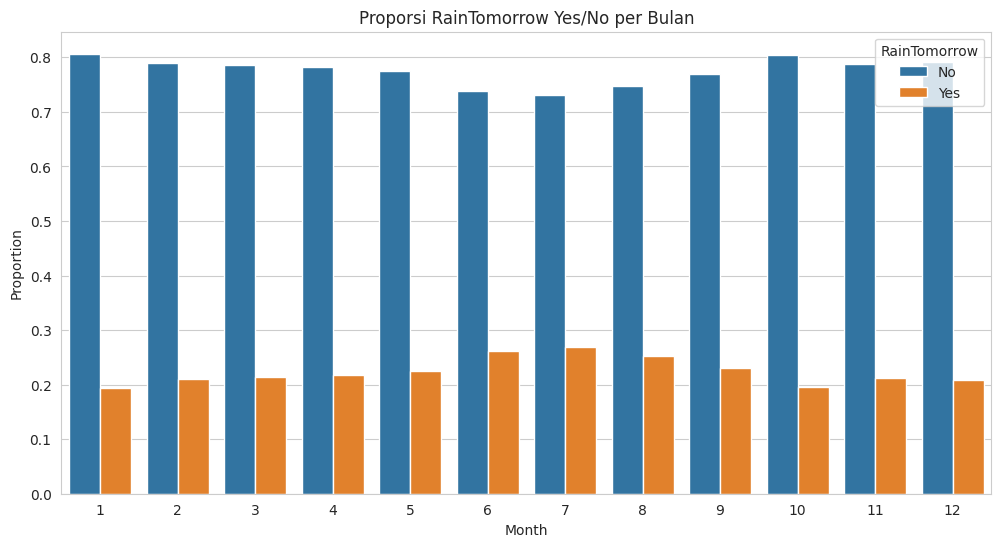

In [ ]:
rain_prop = (
    df.groupby("Month")["RainTomorrow"]
      .value_counts(normalize=True)
      .rename("Proportion")
      .reset_index()
)


plt.figure(figsize=(12,6))
sns.barplot(data=rain_prop, x="Month", y="Proportion", hue="RainTomorrow")
plt.title("Proporsi RainTomorrow Yes/No per Bulan")
plt.ylabel("Proportion")
plt.xlabel("Month")
plt.show()

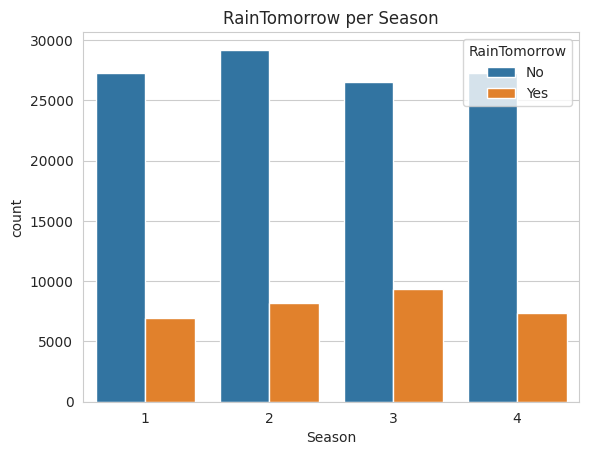

In [ ]:
sns.countplot(x="Season", hue="RainTomorrow", data=df)
plt.title("RainTomorrow per Season")
plt.show()

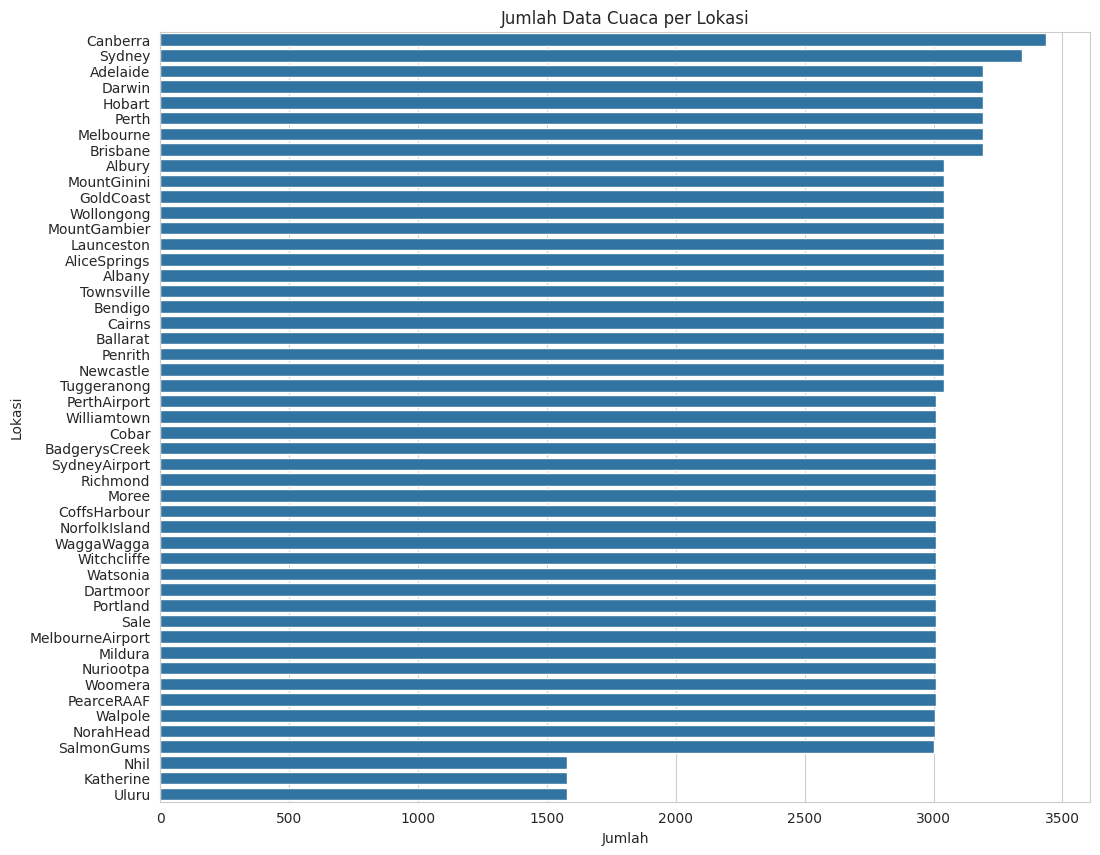

In [ ]:
# Bar plot untuk data kategori (Contoh: Location)
plt.figure(figsize=(12, 10))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Jumlah Data Cuaca per Lokasi')
plt.xlabel('Jumlah')
plt.ylabel('Lokasi')
plt.show()

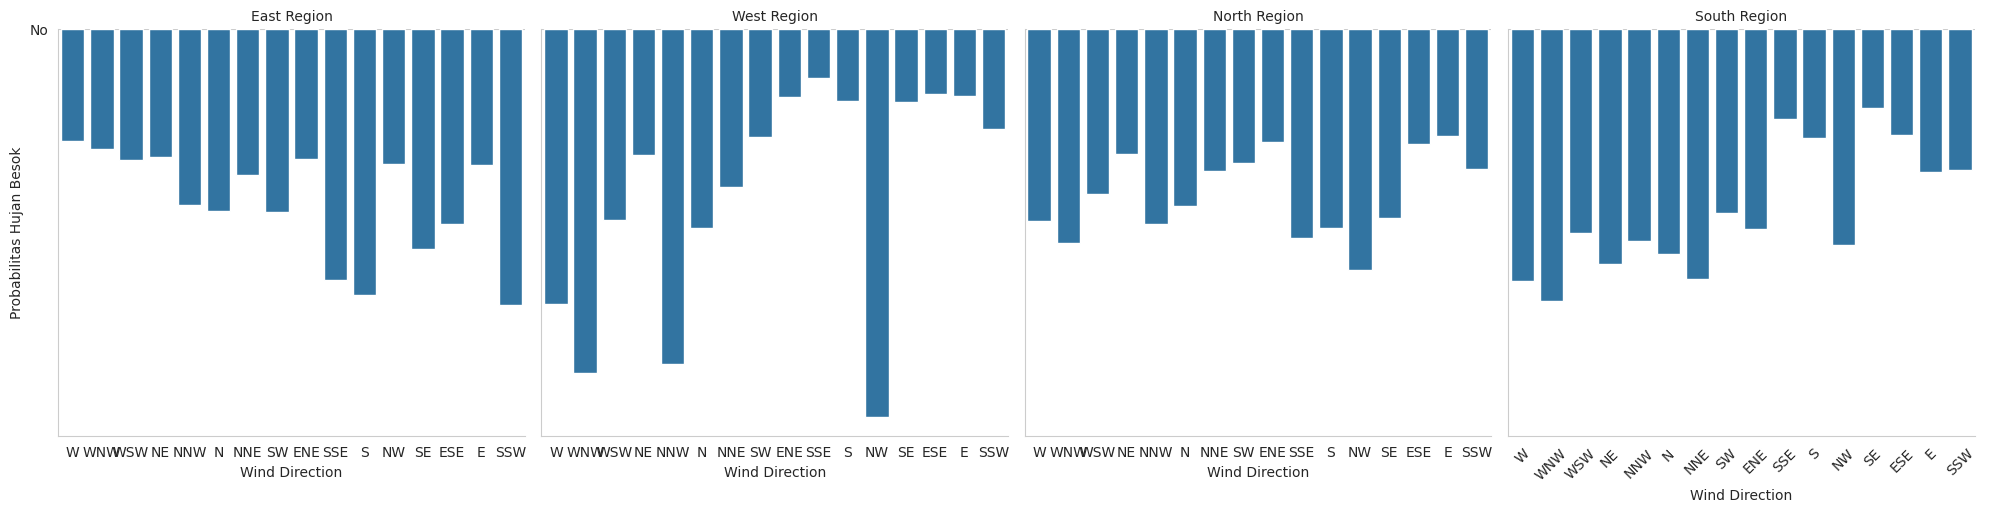

In [ ]:
g = sns.catplot(
    x='WindGustDir',
    y='RainTomorrow',
    col='Region',
    kind='bar',
    data=df,
    ci=None,
    height=5,
    aspect=1
)

g.set_axis_labels("Wind Direction", "Probabilitas Hujan Besok")
g.set_titles("{col_name} Region")
plt.xticks(rotation=45)
plt.show()

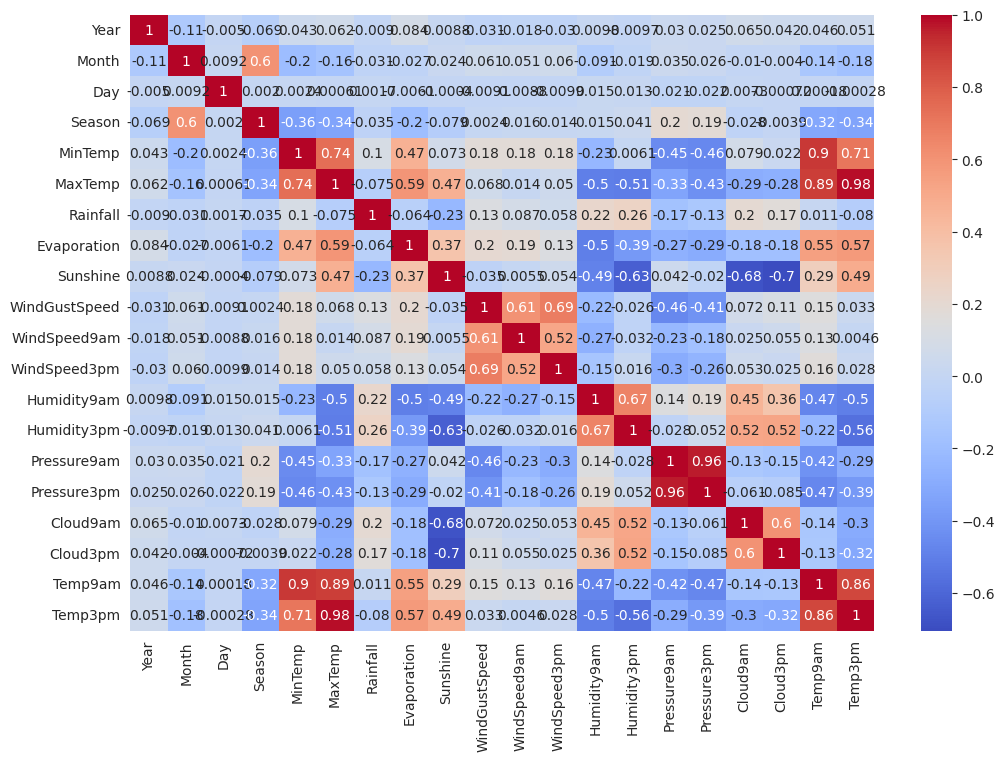

In [ ]:
# Heatmap Korelasi (hanya untuk kolom numerik)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


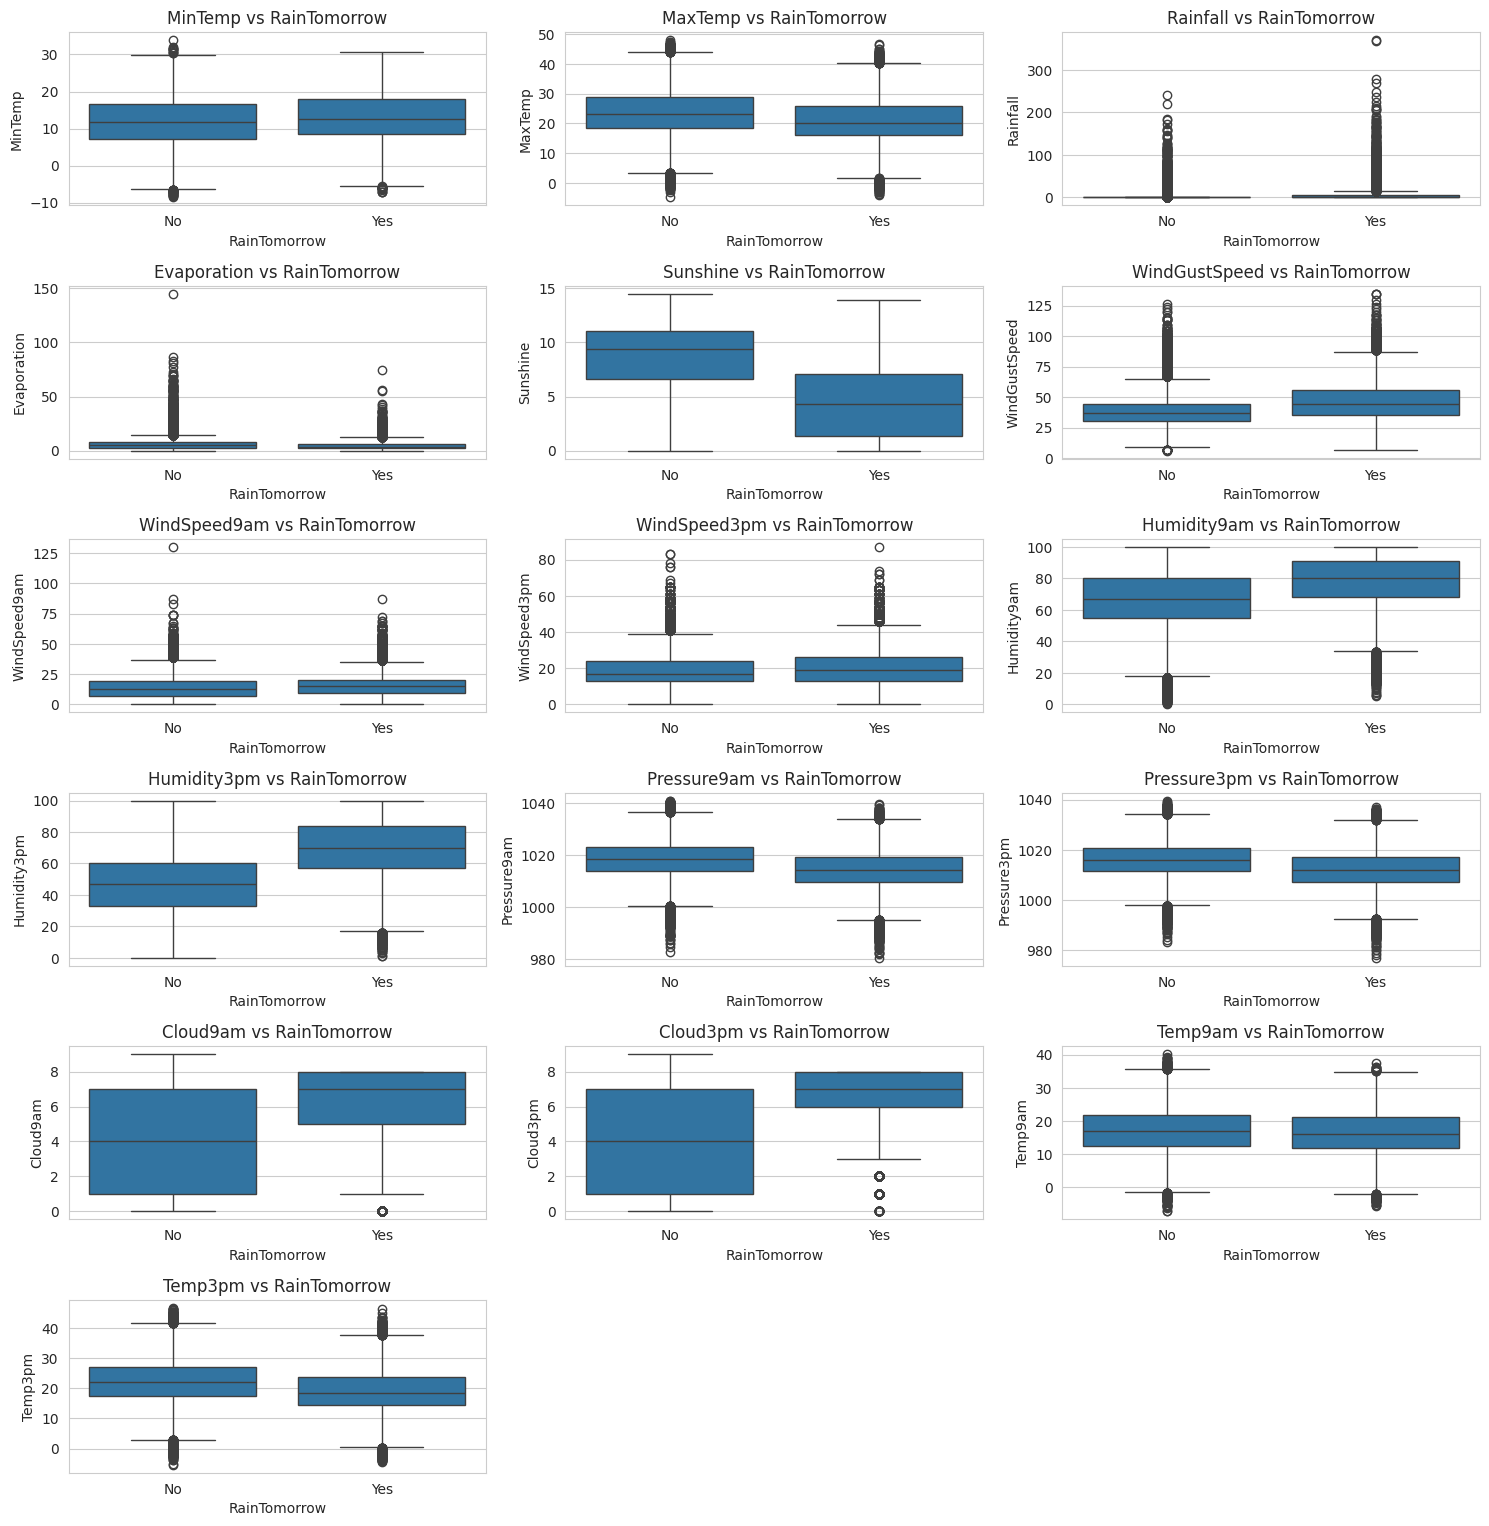

In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
n_rows = (len(num_cols) + 1) // 2
n_cols = 3

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x="RainTomorrow", y=col, data=df)
    plt.title(f"{col} vs RainTomorrow")

plt.tight_layout()
plt.show()

# LANGKAH 3: DATA PRE-PROCESSING

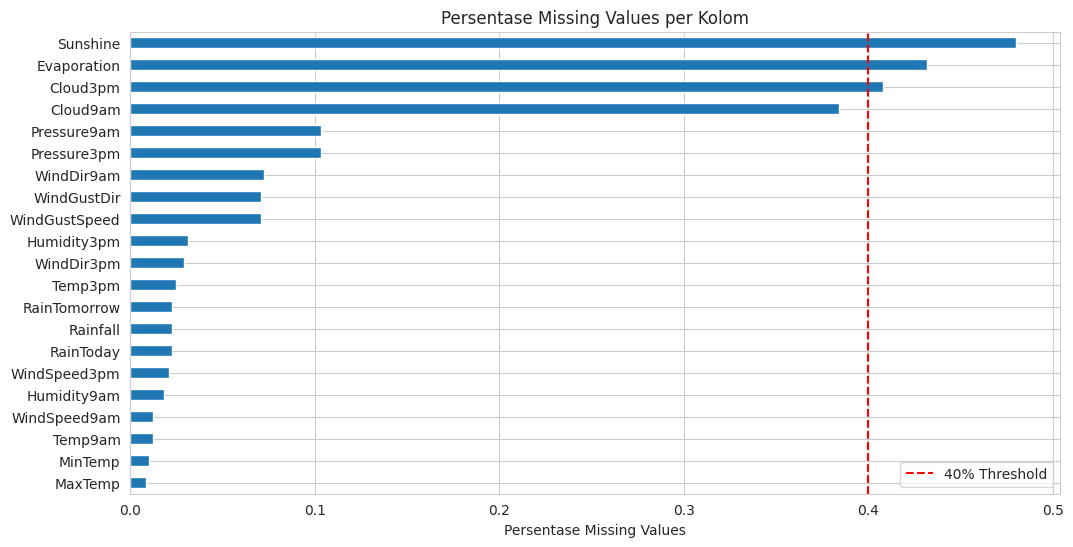

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(12, 6))
missing_percentage = df.isnull().mean().sort_values(ascending=True)
missing_percentage[missing_percentage > 0].plot(kind='barh')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Persentase Missing Values')
plt.axvline(x=0.4, color='red', linestyle='--', label='40% Threshold')
plt.legend()
plt.show()

In [ ]:
# Menghapus kolom dengan Missing value +-40%
df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis=1, inplace=True)

In [ ]:
# Isi kolom numerikal dengan missing value <40% menggunakan median
miss_col_numerical=['Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Rainfall', 'WindSpeed3pm',
                    'Humidity9am', 'Temp9am', 'WindSpeed9am', 'MinTemp', 'MaxTemp']
for col in miss_col_numerical:
    df[col].fillna(df[col].median(), inplace=True)

# Isi kolom kategorikal dengan missing value <40% menggunakan modus
miss_col_categorical=['WindGustDir', 'WindDir3pm', 'WindDir9am', 'RainToday', 'RainTomorrow']
for col in miss_col_categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Year,0
Month,0
Day,0
Season,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,145460.0,2012.769751,2.537684,2007.0,2011.0,2013.0,2015.0,2017.0
Month,145460.0,6.399615,3.427262,1.0,3.0,6.0,9.0,12.0
Day,145460.0,15.712258,8.794789,1.0,8.0,16.0,23.0,31.0
Season,145460.0,2.496968,1.103981,1.0,2.0,2.0,3.0,4.0
MinTemp,145460.0,12.192053,6.365780,-8.5,7.7,12.0,16.8,33.9
MaxTemp,145460.0,23.215962,7.088358,-4.8,18.0,22.6,28.2,48.1
Rainfall,145460.0,2.307990,8.389771,0.0,0.0,0.0,0.6,371.0
WindGustSpeed,145460.0,39.962189,13.120931,6.0,31.0,39.0,46.0,135.0
WindSpeed9am,145460.0,14.030751,8.861796,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,145460.0,18.669758,8.716716,0.0,13.0,19.0,24.0,87.0


In [ ]:
# Cek duplikat pada dataset
df_copy = df.copy()
df_copy.duplicated().sum()

np.int64(0)

## Encoding

In [ ]:
df_tmp = df.copy()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           145460 non-null  int32  
 1   Month          145460 non-null  int32  
 2   Day            145460 non-null  int32  
 3   Season         145460 non-null  int32  
 4   Location       145460 non-null  object 
 5   MinTemp        145460 non-null  float64
 6   MaxTemp        145460 non-null  float64
 7   Rainfall       145460 non-null  float64
 8   WindGustDir    145460 non-null  object 
 9   WindGustSpeed  145460 non-null  float64
 10  WindDir9am     145460 non-null  object 
 11  WindDir3pm     145460 non-null  object 
 12  WindSpeed9am   145460 non-null  float64
 13  WindSpeed3pm   145460 non-null  float64
 14  Humidity9am    145460 non-null  float64
 15  Humidity3pm    145460 non-null  float64
 16  Pressure9am    145460 non-null  float64
 17  Pressure3pm    145460 non-nul

In [ ]:
# Untuk variabel numerikal - LabelEndoer
le = LabelEncoder()
df_tmp['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])  # 0: No, 1: Yes
df_tmp['RainToday'] = le.fit_transform(df['RainToday'])  # 0: No, 1: Yes

# Untuk variabel kategorikal dengan banyak kategori - One-Hot Encoding
categorical_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Region']

df_tmp = pd.get_dummies(df_tmp, columns=categorical_to_encode, drop_first=True)

In [ ]:
pd.set_option('display.max_columns', None)
df_tmp

,Year,Month,Day,Season,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Region_North,Region_South,Region_West
0,2008,12,1,1,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2008,12,2,1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2008,12,3,1,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,2008,12,4,1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
# korelasi dengan kolom target
cor = df_tmp.corr()
cor_target = abs(cor['RainTomorrow'])
relevant_features = cor_target[cor_target>0]
relevant_features.sort_values(ascending=False)

,RainTomorrow
RainTomorrow,1.000000
Humidity3pm,0.433167
RainToday,0.305744
Humidity9am,0.251415
Rainfall,0.233877
...,...
Location_Brisbane,0.001051
Location_MelbourneAirport,0.000749
WindGustDir_S,0.000538
WindDir3pm_WSW,0.000482


## Balancing Data menggunakan SMOTE

In [ ]:
# Memisahkan features dan target
X = df_tmp.drop('RainTomorrow', axis=1)
y = df_tmp['RainTomorrow']

# Distribusi class sebelum SMOTE
print("Distribusi class sebelum SMOTE:")
print(Counter(y))

# Balancing target dengan SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Distribusi setelah SMOTE
print("Distribusi class setelah SMOTE:")
print(Counter(y_resampled))

Distribusi class sebelum SMOTE:
Counter({0: 113583, 1: 31877})
Distribusi class setelah SMOTE:
Counter({0: 113583, 1: 113583})


## Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    stratify=y_resampled, # supaya ratio value di data training dan test sama
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (181732, 113)
Dimensi y_train dataset:  (181732,)
Dimensi X_test dataset:  (45434, 113)
Dimensi y_test dataset:  (45434,)


## Feature Scaling

In [ ]:
X_train

,Year,Month,Day,Season,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Region_North,Region_South,Region_West
172603,2015,4,25,1,15.466425,20.577979,1.155233,27.111918,17.833938,9.555959,66.000000,65.444041,1017.161736,1015.161736,18.511555,19.183394,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
84996,2011,3,17,2,21.800000,29.400000,0.000000,22.000000,0.000000,11.000000,69.000000,62.000000,1018.600000,1015.000000,26.300000,27.900000,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
157271,2016,8,2,3,7.848992,14.734874,0.297983,35.040335,4.040335,14.959665,99.510084,99.020168,1014.000000,1014.604034,10.871176,9.891933,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
155790,2014,5,16,2,8.523666,16.553944,5.102630,54.000000,7.000000,23.026295,63.539443,39.000000,1012.186215,10

In [ ]:
sc_X = StandardScaler() # objek scaler
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) # scaler mempelajari isi nilainya(fit) kemudian mengubah menjadi nilai yg lain (transform)
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test)) # untuk data testing, scaler tidak mempelajari lagi, melainkan langsung mengubah nilainya
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train

,Year,Month,Day,Season,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Region_North,Region_South,Region_West
172603,0.982806,-0.685672,1.081378,-1.346057,0.459064,-0.265838,-0.223937,-1.056843,0.365484,-1.078748,-0.338209,0.366712,0.079184,0.125421,0.255708,-0.237715,-0.599427,-0.17478,-0.164356,-0.13704,-0.162332,-0.166358,-0.162867,-0.165956,-0.182714,-0.169579,-0.147644,-0.181666,-0.184332,-0.172781,-0.170624,-0.169149,-0.104470,-0.167698,-0.170914,-0.166236,-0.144857,-0.145410,-0.189066,-0.161599,-0.165851,-0.112342,-0.17327,5.315099,-0.165991,-0.159289,-0.163223,-0.170658,-0.164603,-0.195968,-0.157464,-0.162046,-0.158543,-0.185287,-0.174864,-0.157372,6.270739,-0.096537,-0.1607,-0.190079,-0.172155,-0.169939,-0.183916,-0.170624,-0.132016,3.845832,-0.249849,-0.317163,-0.253459,-0.255017,-0.271509,-0.304592,-0.298697,-0.289531,-0.289810,-0.292313,-0.288816,-0.475183,-0.305390,-0.304269,-0.259708,4.046274,-0.499747,3.712111,-0.295263,-0.307785,-0.316543,-0.281301,-0.280412,-0.281824,-0.271182,-0.288962,-0.299494,-0.283923,-0.267764,-0.261958,-0.269353,-0.313164,-0.272978,-0.258995,-0.297724,-0.312592,-0.308331,-0.379014,3.444043,-0.279920,-0.292080,-0.329712,-0.317352,-0.304603,-0.473799,1.256453,-0.537441
84996,-0.659428,-0.988739,0.160074,-0.403021,1.464116,0.988241,-0.329469,-1.422870,-1.623265,-0.916928,-0.174022,0.205599,0.290128,0.101484,1.479100,1.043791,-0.599427,-0.17478,-0.164356,-0.13704,-0.162332,-0.166358,-0.162867,6.025693,-0.182714,-0.169579,-0.147644,-0.181666,-0.184332,-0.172781,-0.170624,-0.169149,-0.104470,-0.167698,-0.170914,-0.166236,-0.144857,-0.145410,-0.189066,-0.161599,-0.165851,-0.112342,-0.17327,-0.188143,-0.165991,-0.159289,-0.163223,-0.170658,-0.164603,-0.195968,-0.157464,-0.162046,-0.158543,-0.185287,-0.174864,-0.157372,-0.159471,-0.096537,-0.1607,-0.190079,-0.172155,-0.169939,-0.183916,-0.170624,-0.132016,3.845832,-0.249849,-0.317163,-0.253459,-0.255017,-0.271509,-0.304592,-0.298697,-0.289531,-0.289810,-0.292313,-0.288816,-0.475183,-0.305390,-0.304269,-0.259708,-0.247141,2.001012,-0.269389,-0.295263,-0.307785,-0.316543,-0.281301,-0.280412,-0.281824,-0.271182,-0.288962,-0.299494,-0.283923,-0.267764,3.817405,-0.269353,-0.313164,-0.272978,-0.258995,-0.297724,-0.312592,-0.308331,-0.379014,-0.290356,-0.279920,-0.292080,-0.329712,-0.317352,-0.304603,2.110600,-0.795892,-0.537441
157271,1.

# LANGKAH 4: MODELING & EVALUATION

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 42,
                                                         class_weight='balanced')))

models.append(('XGBoost', XGBClassifier(n_estimators=100, learning_rate=0.05,
                                        eval_metric='logloss', random_state=42)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 42)))

In [ ]:
acc_results = []
auc_results = []
names = []
# Atur hasil output yang diinginkan
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluasi semua model menggunakan k-fold cross validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,97.08,0.11,91.15,0.25
0,Logistic Regression,95.24,0.17,89.07,0.24
1,XGBoost,93.78,0.17,86.36,0.22


Model Terbaik adalah Random Forest

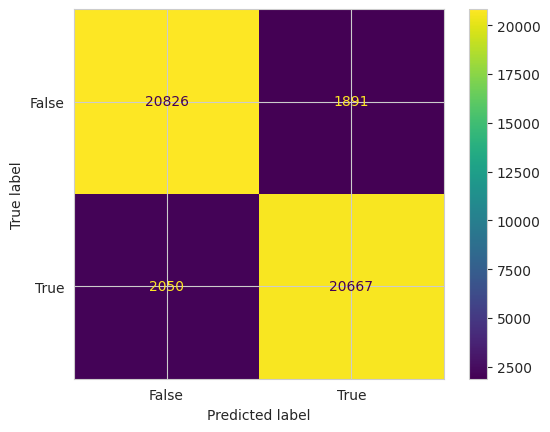

In [ ]:
# Fit model Random Forest ke data train
rf_model = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
# Evaluasi hasil model pada data test
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC '])

print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score  ROC AUC 
0  Random Forest  0.913259   0.916172  0.909759  0.912954  0.911035  0.913259


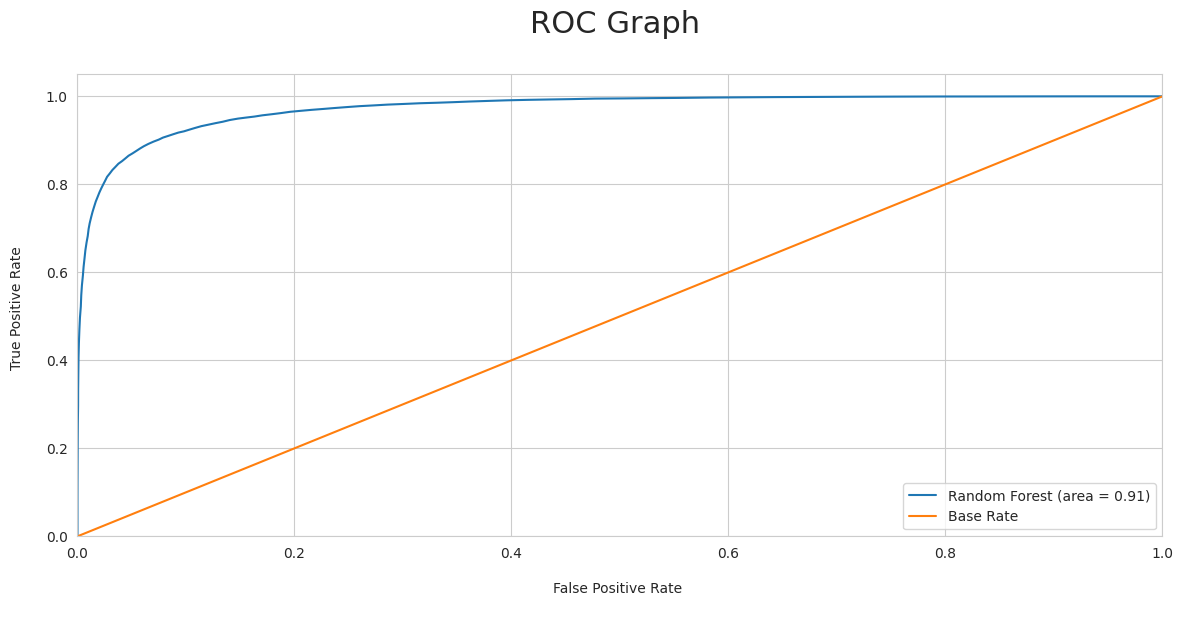

In [ ]:
# Evaluasi model dengan ROC Graph
rf_model.fit(X_train, y_train)
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = roc_auc_score(y_test, y_pred )

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

# LANGKAH 5: DEPLOYMENT